Here we use SVD to extract the important features of an image. A black and white image is just a matrix, and the numbers represents the intensity of a pixel.
inspired by: https://hadrienj.github.io/posts/Deep-Learning-Book-Series-2.8-Singular-Value-Decomposition/

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image

They are our assistants:

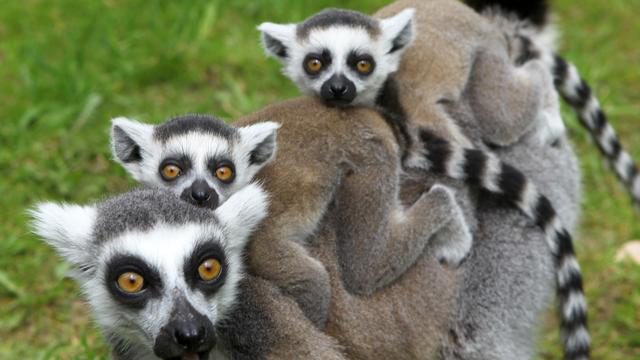

In [5]:
plt.style.use('dark_background')
img = Image.open('SVD_on_image/trip.jpeg')
img


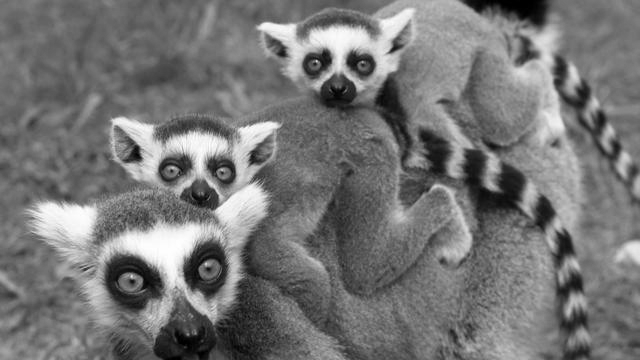

In [6]:
# convert to grayscale
img_grey = img.convert('L')
img_grey

In [7]:
# get the image size - this will be the size of the image matrix
colnb = img_grey.size[0]
rownb = img_grey.size[1]
(colnb,rownb)

(640, 360)

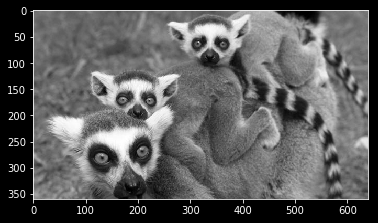

In [9]:
# convert the image to a numpy matrix
img_matrix = np.array(list(img_grey.getdata(band=0)), float)
img_matrix.shape = (rownb, colnb)

plt.imshow(img_matrix, cmap = 'gray')


Left singular vectors, singular values, right singular vectors:

In [10]:
U, D, V = np.linalg.svd(img_matrix)
# check the size
(img_matrix.shape, U.shape, D.shape, V.shape)

((360, 640), (360, 360), (360,), (640, 640))

In U and V the first singular vectors explaine the largest variance. Here we reconstruct the image with the first 10 vectors. Here we can recognize the heads of our assistants easily.

((360, 5), (5, 5), (5, 640))

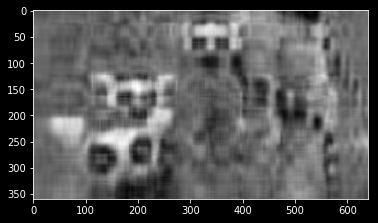

In [11]:
reconst_img1 = np.matrix(U[:, 0:10]) * np.diag(D[0:10]) * np.matrix(V[0:10, :])
plt.imshow(reconst_img1, cmap='gray')
(np.matrix(U[:, :5]).shape, np.diag(D[:5]).shape, np.matrix(V[:5, :]).shape)

If we skip the first five we can recognize them, but this is a bit harder.

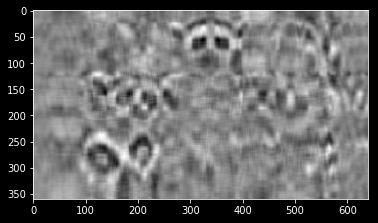

In [12]:
reconst_img2 = np.matrix(U[:, 5:15]) * np.diag(D[5:15]) * np.matrix(V[5:15, :])
plt.imshow(reconst_img2, cmap='gray')



And harder . . .

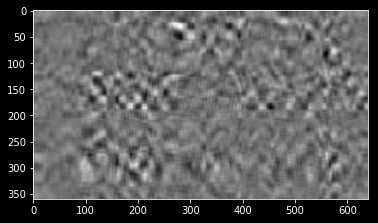

In [13]:
reconst_img3 = np.matrix(U[:, 10:20]) * np.diag(D[10:20]) * np.matrix(V[10:20, :])
plt.imshow(reconst_img3, cmap='gray')


And with the 50-100th vectors we can recognise the eyes, maybe the ears. It i interesting, that the eyes are so recognizabel on this very bad reconstruction.

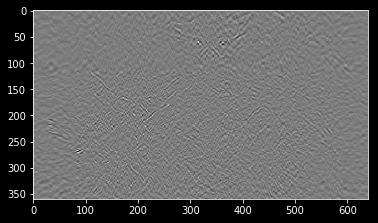

In [14]:

reconst_img4 = np.matrix(U[:, 50:100]) * np.diag(D[50:100]) * np.matrix(V[50:100, :])
plt.imshow(reconst_img4, cmap='gray')


But with the 0-50th vectors we get a very good image.

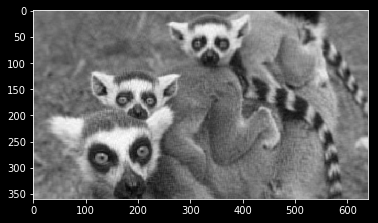

In [15]:
reconst_img5 = np.matrix(U[:, 0:50]) * np.diag(D[0:50]) * np.matrix(V[0:50, :])
plt.imshow(reconst_img5, cmap='gray')

The original matrix size was 640x360 = 230400
The new size of matrixes is 360x50 + 50 + 50x640 = 50050
So the size is less, than a quarter of the original, and we have a really good quality image.